## Naive Bayes
This notebook runs the drug repurposing project's second model, Naive Bayesian. Run all 50 assays, will create balanced and unbalanced models using the sample weight in sklearn.

### Unbalanced

### Read in data

In [ ]:
import random
import math

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

from sklearn import preprocessing
from sklearn.utils import compute_class_weight
from sklearn.naive_bayes import BernoulliNB

import pymc as pm
import arviz as az
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from google.colab import drive


In [ ]:
drive.mount('/content/drive')

# Set working directory
path = '/content/drive/My Drive/Tox21_data/'

Mounted at /content/drive


In [ ]:
xls = pd.ExcelFile(path + 'Tox21/assay_list.xls')

# Now you can list all sheets in the file
xls.sheet_names

# to read just one sheet to dataframe:
df = []
for i in range(len(xls.sheet_names)):
    df1 = xls.parse(i)
    df.append(df1)

len(df)


22

In [ ]:
xls2 = pd.ExcelFile(path + 'Tox21/assay_list2.xls')

for i in range(len(xls2.sheet_names)):
    df1 = xls2.parse(i)
    df.append(df1)

len(df)



50

### Run all 50 assays

tox21-ahr-p1
              precision    recall  f1-score   support

           0       0.96      0.71      0.81      1795
           1       0.15      0.65      0.24       142

    accuracy                           0.70      1937
   macro avg       0.56      0.68      0.53      1937
weighted avg       0.90      0.70      0.77      1937



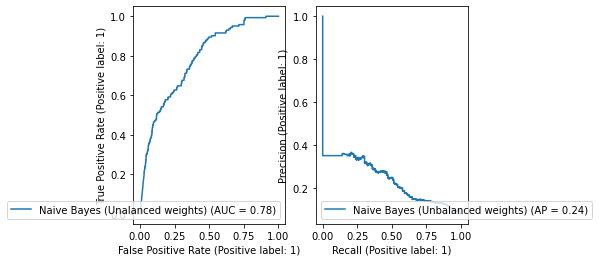

tox21-ap1-agonist-p1
              precision    recall  f1-score   support

           0       0.97      0.73      0.84      1728
           1       0.09      0.57      0.16        84

    accuracy                           0.72      1812
   macro avg       0.53      0.65      0.50      1812
weighted avg       0.93      0.72      0.80      1812



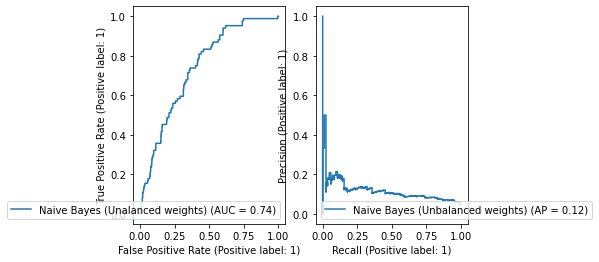

tox21-ar-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.94      0.69      0.79      1704
           1       0.18      0.62      0.28       192

    accuracy                           0.68      1896
   macro avg       0.56      0.65      0.54      1896
weighted avg       0.86      0.68      0.74      1896



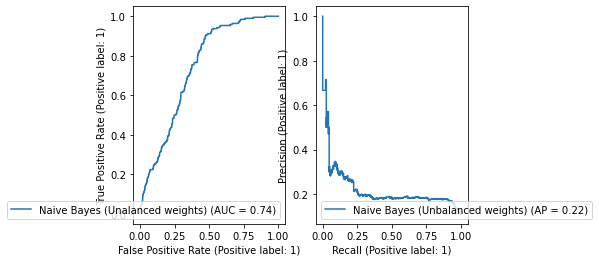

tox21-ar-mda-kb2-luc-agonist-p3
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1602
           1       0.21      0.63      0.32       199

    accuracy                           0.70      1801
   macro avg       0.58      0.67      0.56      1801
weighted avg       0.86      0.70      0.75      1801



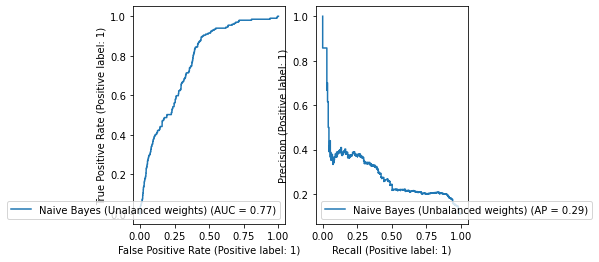

tox21-ar-mda-kb2-luc-antagonist-p1
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      1825
           1       0.15      0.62      0.24       156

    accuracy                           0.69      1981
   macro avg       0.55      0.66      0.52      1981
weighted avg       0.89      0.69      0.76      1981



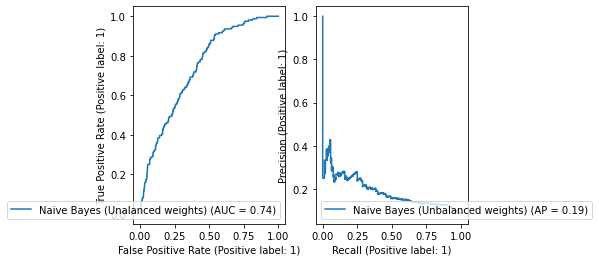

tox21-ar-mda-kb2-luc-antagonist-p2
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      1694
           1       0.19      0.63      0.29       158

    accuracy                           0.73      1852
   macro avg       0.57      0.69      0.56      1852
weighted avg       0.89      0.73      0.79      1852



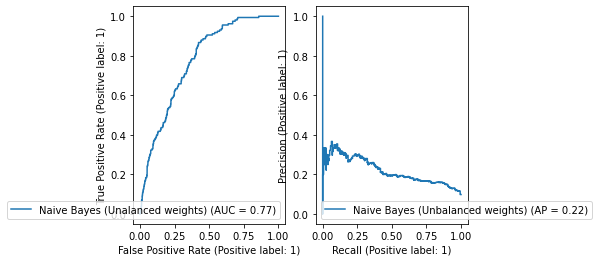

tox21-are-bla-p1
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      1591
           1       0.15      0.65      0.24       126

    accuracy                           0.70      1717
   macro avg       0.55      0.68      0.53      1717
weighted avg       0.90      0.70      0.77      1717



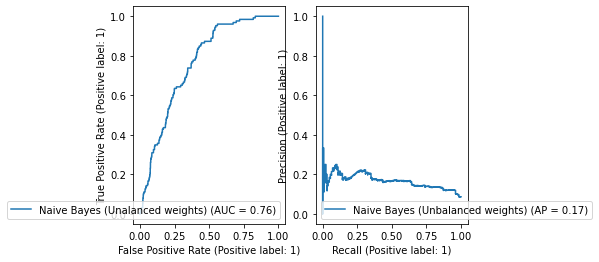

tox21-aromatase-p1
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1696
           1       0.20      0.56      0.30       217

    accuracy                           0.70      1913
   macro avg       0.56      0.64      0.55      1913
weighted avg       0.84      0.70      0.75      1913



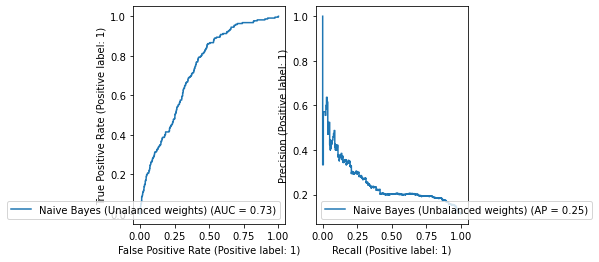

tox21-car-agonist-p1
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      1652
           1       0.16      0.61      0.25       160

    accuracy                           0.68      1812
   macro avg       0.55      0.65      0.52      1812
weighted avg       0.88      0.68      0.75      1812



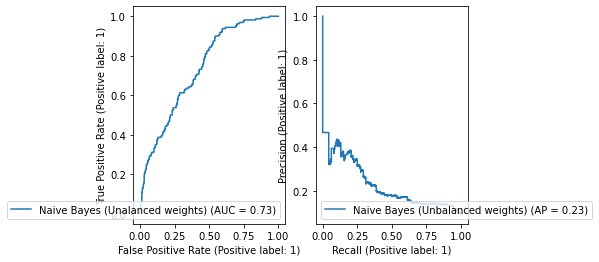

tox21-car-antagonist-p1
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      1634
           1       0.21      0.68      0.32       188

    accuracy                           0.70      1822
   macro avg       0.58      0.69      0.56      1822
weighted avg       0.87      0.70      0.75      1822



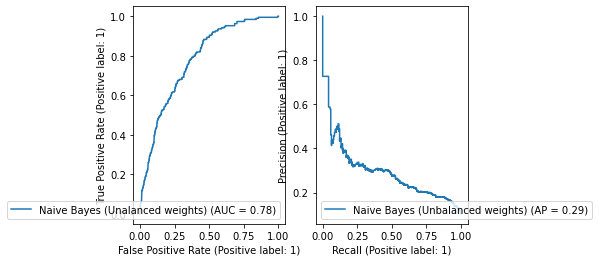

tox21-elg1-luc-agonist-p1
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1793
           1       0.14      0.55      0.22       151

    accuracy                           0.70      1944
   macro avg       0.54      0.63      0.52      1944
weighted avg       0.89      0.70      0.77      1944



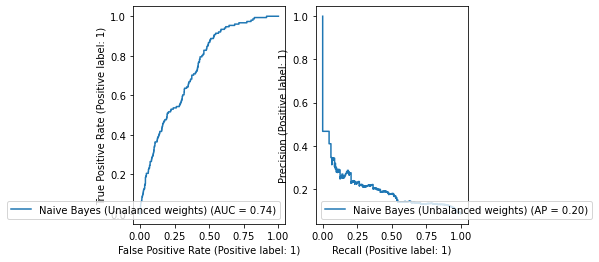

tox21-er-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      1818
           1       0.09      0.60      0.16        89

    accuracy                           0.70      1907
   macro avg       0.53      0.65      0.49      1907
weighted avg       0.93      0.70      0.79      1907



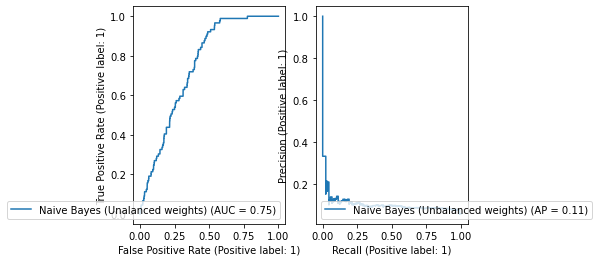

tox21-er-luc-bg1-4e2-agonist-p4
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1587
           1       0.22      0.61      0.32       191

    accuracy                           0.72      1778
   macro avg       0.58      0.67      0.57      1778
weighted avg       0.86      0.72      0.77      1778



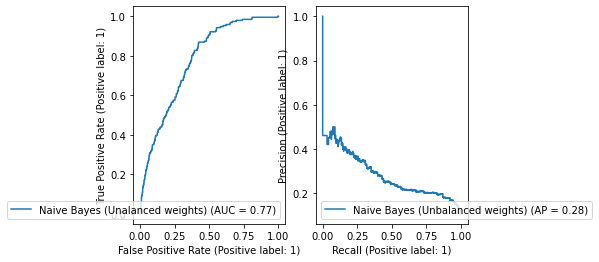

tox21-er-luc-bg1-4e2-antagonist-p1
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      1810
           1       0.14      0.65      0.23       130

    accuracy                           0.70      1940
   macro avg       0.55      0.68      0.52      1940
weighted avg       0.91      0.70      0.78      1940



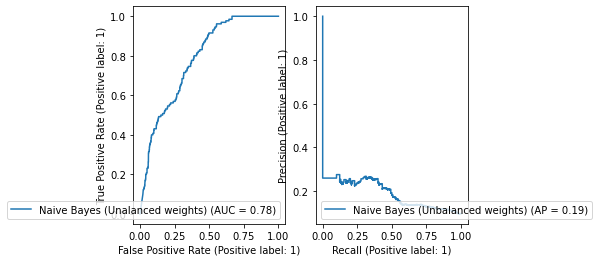

tox21-er-luc-bg1-4e2-antagonist-p2
              precision    recall  f1-score   support

           0       0.97      0.77      0.85      1746
           1       0.10      0.49      0.16        90

    accuracy                           0.75      1836
   macro avg       0.53      0.63      0.51      1836
weighted avg       0.92      0.75      0.82      1836



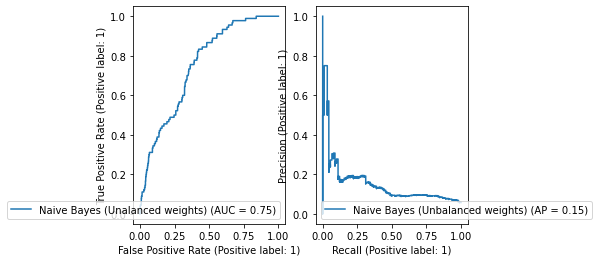

tox21-erb-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      1602
           1       0.22      0.72      0.34       183

    accuracy                           0.71      1785
   macro avg       0.59      0.72      0.58      1785
weighted avg       0.88      0.71      0.77      1785



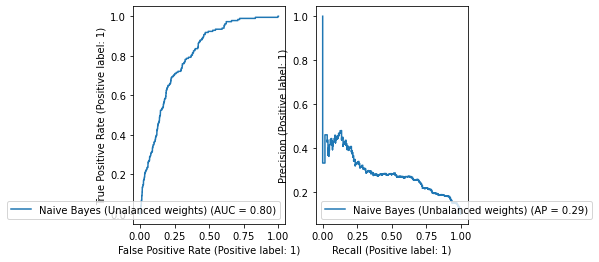

tox21-erb-bla-p1
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      1492
           1       0.25      0.75      0.37       198

    accuracy                           0.70      1690
   macro avg       0.60      0.72      0.59      1690
weighted avg       0.87      0.70      0.75      1690



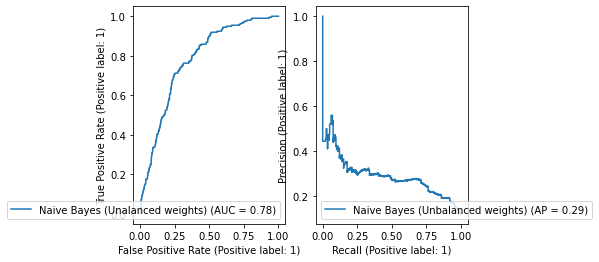

tox21-err-p1
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1514
           1       0.27      0.69      0.39       231

    accuracy                           0.71      1745
   macro avg       0.60      0.70      0.60      1745
weighted avg       0.85      0.71      0.75      1745



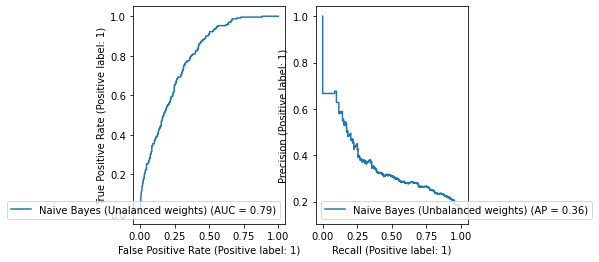

tox21-esre-bla-p1
              precision    recall  f1-score   support

           0       0.97      0.72      0.82      1540
           1       0.14      0.64      0.23       109

    accuracy                           0.71      1649
   macro avg       0.55      0.68      0.53      1649
weighted avg       0.91      0.71      0.78      1649



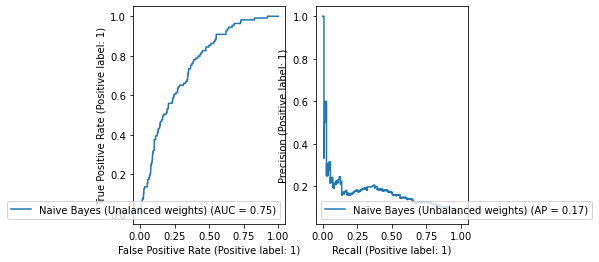

tox21-fxr-bla-agonist-p2
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      1445
           1       0.16      0.71      0.26       111

    accuracy                           0.71      1556
   macro avg       0.56      0.71      0.54      1556
weighted avg       0.91      0.71      0.78      1556



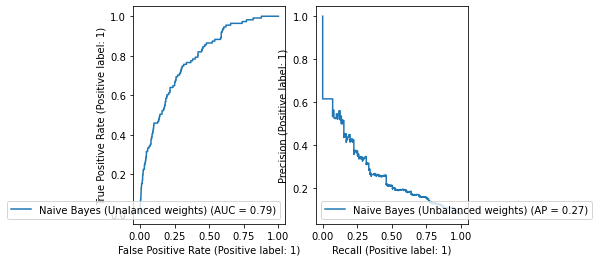

tox21-fxr-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.97      0.72      0.82      1516
           1       0.15      0.66      0.24       113

    accuracy                           0.72      1629
   macro avg       0.56      0.69      0.53      1629
weighted avg       0.91      0.72      0.78      1629



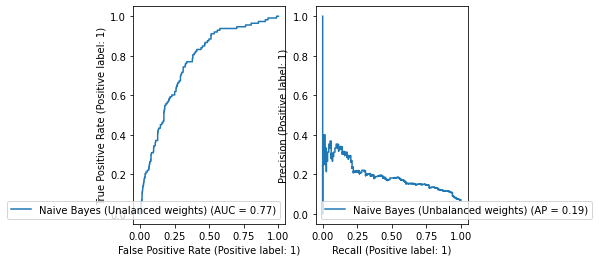

tox21-gh3-tre-antagonist-p1
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1399
           1       0.38      0.70      0.49       328

    accuracy                           0.73      1727
   macro avg       0.65      0.72      0.65      1727
weighted avg       0.81      0.73      0.75      1727



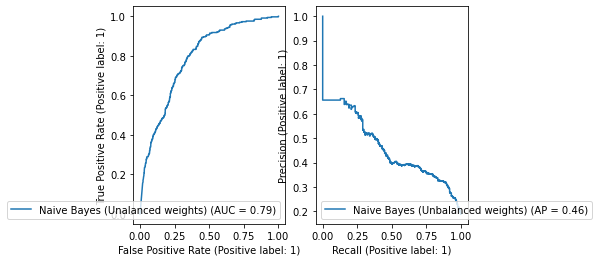

tox21-gr-hela-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.96      0.69      0.81      1742
           1       0.12      0.60      0.20       122

    accuracy                           0.69      1864
   macro avg       0.54      0.65      0.50      1864
weighted avg       0.91      0.69      0.77      1864



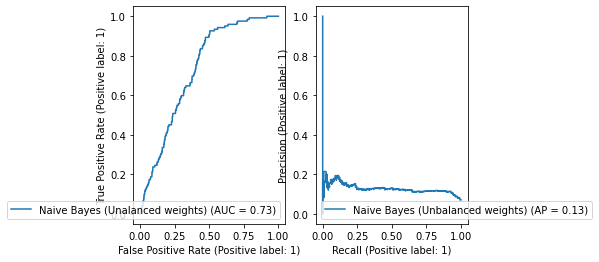

tox21-h2ax-cho-p2
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      1574
           1       0.21      0.71      0.33       178

    accuracy                           0.70      1752
   macro avg       0.58      0.70      0.57      1752
weighted avg       0.88      0.70      0.76      1752



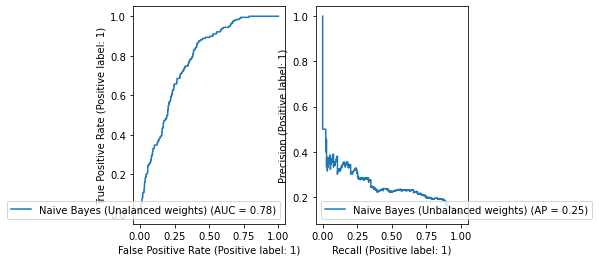

tox21-hdac-p1
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1846
           1       0.02      0.23      0.04        26

    accuracy                           0.86      1872
   macro avg       0.51      0.55      0.49      1872
weighted avg       0.97      0.86      0.91      1872



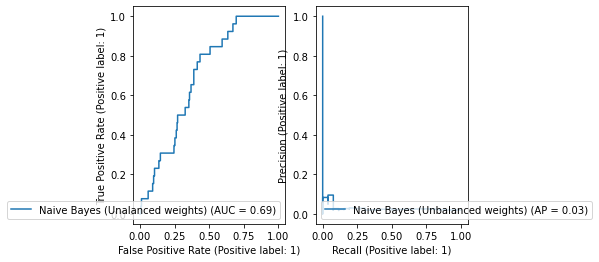

tox21-hre-bla-agonist-p1
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      1607
           1       0.18      0.68      0.28       146

    accuracy                           0.71      1753
   macro avg       0.57      0.70      0.55      1753
weighted avg       0.90      0.71      0.77      1753



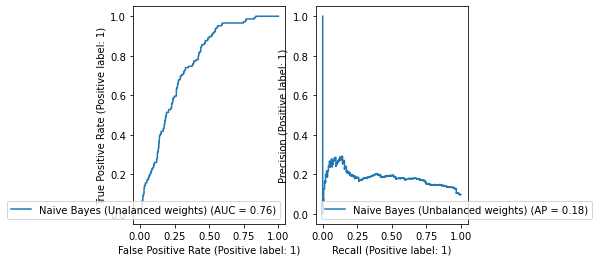

tox21-hse-bla-p1
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      1513
           1       0.12      0.67      0.20        89

    accuracy                           0.70      1602
   macro avg       0.55      0.69      0.51      1602
weighted avg       0.93      0.70      0.78      1602



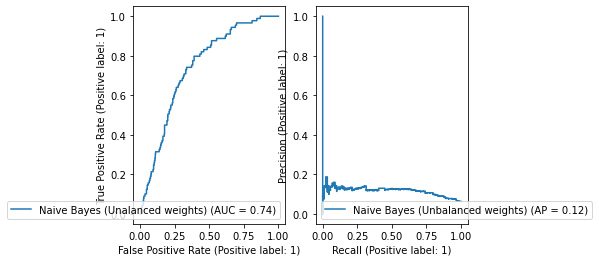

tox21-mitotox-p1
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      1860
           1       0.09      0.46      0.14        97

    accuracy                           0.73      1957
   macro avg       0.52      0.60      0.49      1957
weighted avg       0.92      0.73      0.80      1957



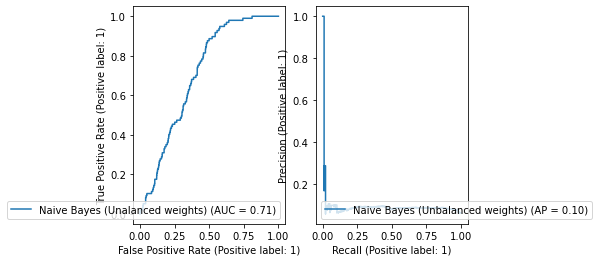

tox21-nfkb-bla-agonist-p1
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1548
           1       0.10      0.69      0.18        75

    accuracy                           0.70      1623
   macro avg       0.54      0.70      0.50      1623
weighted avg       0.94      0.70      0.79      1623



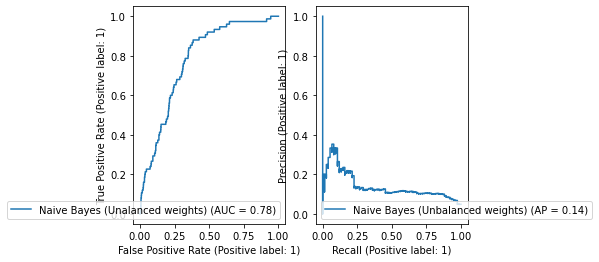

tox21-p53-bla-p1
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      1824
           1       0.15      0.69      0.25       139

    accuracy                           0.71      1963
   macro avg       0.56      0.70      0.53      1963
weighted avg       0.91      0.71      0.78      1963



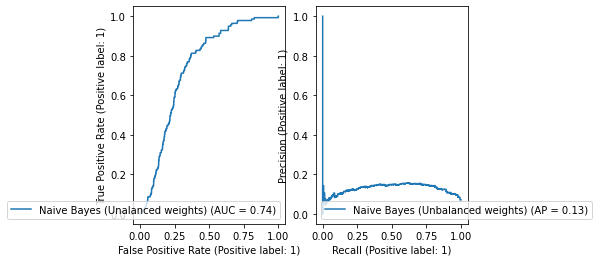

tox21-pgc-err-p1
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1530
           1       0.26      0.67      0.38       221

    accuracy                           0.72      1751
   macro avg       0.60      0.70      0.60      1751
weighted avg       0.85      0.72      0.76      1751



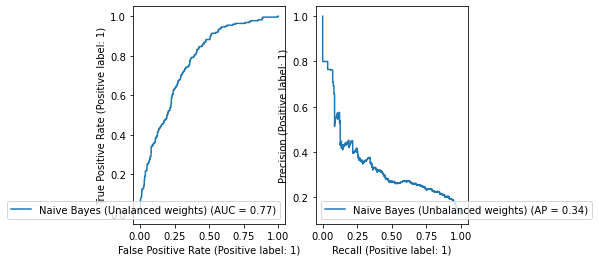

tox21-ppard-bla-agonist-p1
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1440
           1       0.24      0.69      0.36       196

    accuracy                           0.70      1636
   macro avg       0.59      0.70      0.58      1636
weighted avg       0.86      0.70      0.75      1636



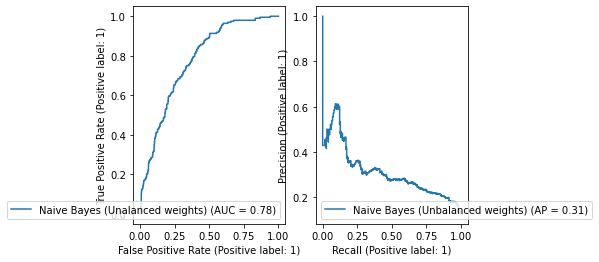

tox21-ppard-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1388
           1       0.21      0.68      0.32       149

    accuracy                           0.72      1537
   macro avg       0.58      0.70      0.57      1537
weighted avg       0.88      0.72      0.77      1537



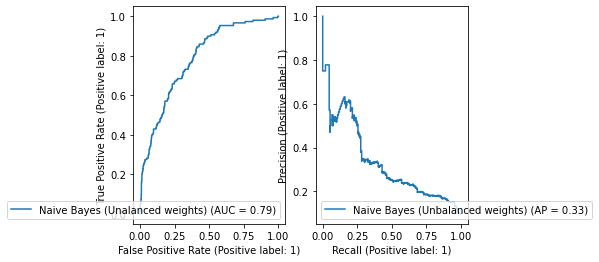

tox21-pparg-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      1371
           1       0.17      0.65      0.27       125

    accuracy                           0.71      1496
   macro avg       0.56      0.68      0.54      1496
weighted avg       0.89      0.71      0.77      1496



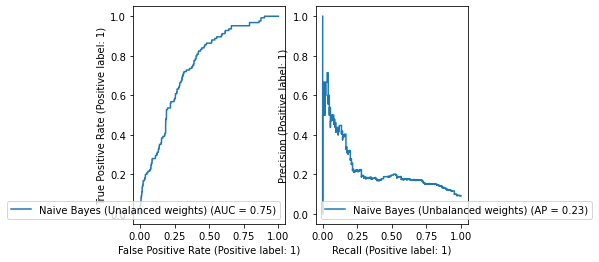

tox21-pr-bla-agonist-p1
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1369
           1       0.21      0.69      0.32       143

    accuracy                           0.72      1512
   macro avg       0.58      0.71      0.57      1512
weighted avg       0.89      0.72      0.78      1512



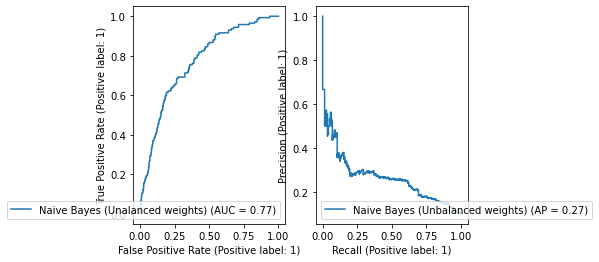

tox21-pr-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1506
           1       0.18      0.62      0.28       168

    accuracy                           0.69      1674
   macro avg       0.56      0.66      0.54      1674
weighted avg       0.87      0.69      0.75      1674



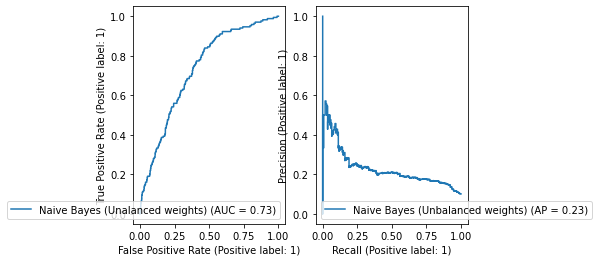

tox21-rar-antagonist-p2
              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1712
           1       0.12      0.57      0.19        99

    accuracy                           0.74      1811
   macro avg       0.54      0.66      0.52      1811
weighted avg       0.92      0.74      0.81      1811



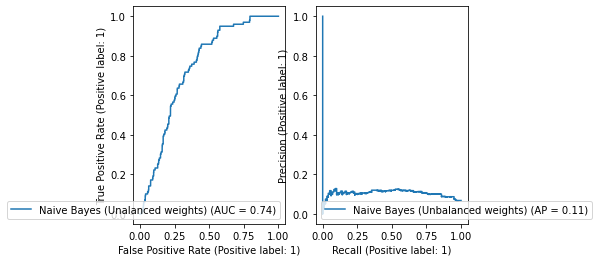

tox21-ror-cho-antagonist-p1
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      1598
           1       0.15      0.64      0.24       119

    accuracy                           0.72      1717
   macro avg       0.56      0.68      0.53      1717
weighted avg       0.91      0.72      0.79      1717



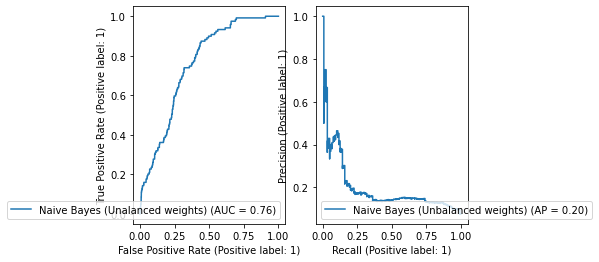

tox21-rxr-bla-agonist-p1
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      1549
           1       0.23      0.73      0.35       197

    accuracy                           0.70      1746
   macro avg       0.59      0.71      0.58      1746
weighted avg       0.87      0.70      0.75      1746



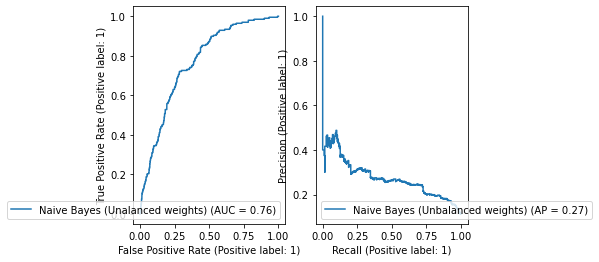

tox21-sbe-bla-agonist-p1
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1783
           1       0.10      0.58      0.18        71

    accuracy                           0.79      1854
   macro avg       0.54      0.69      0.53      1854
weighted avg       0.95      0.79      0.86      1854



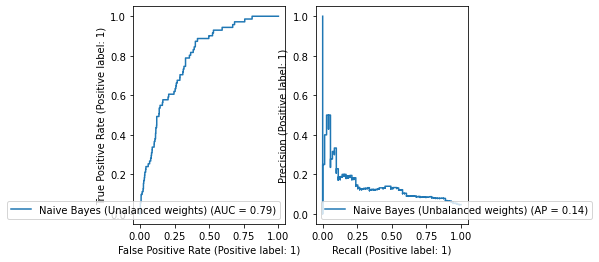

tox21-sbe-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1778
           1       0.07      0.49      0.12        61

    accuracy                           0.77      1839
   macro avg       0.52      0.63      0.49      1839
weighted avg       0.95      0.77      0.84      1839



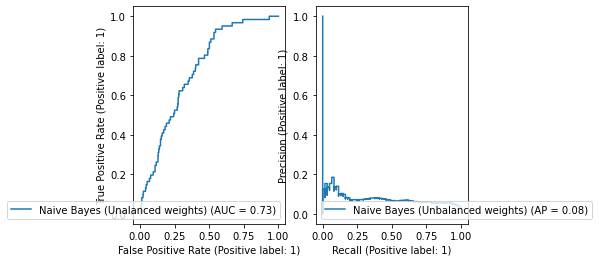

tox21-shh-3t3-gli3-agonist-p1
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1541
           1       0.24      0.62      0.34       232

    accuracy                           0.69      1773
   macro avg       0.58      0.66      0.57      1773
weighted avg       0.83      0.69      0.74      1773



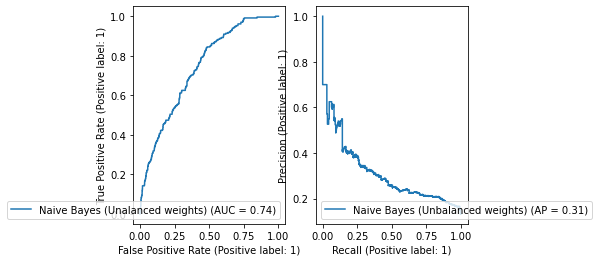

tox21-shh-3t3-gli3-antagonist-p1
              precision    recall  f1-score   support

           0       0.93      0.71      0.80      1544
           1       0.22      0.61      0.32       213

    accuracy                           0.69      1757
   macro avg       0.57      0.66      0.56      1757
weighted avg       0.84      0.69      0.74      1757



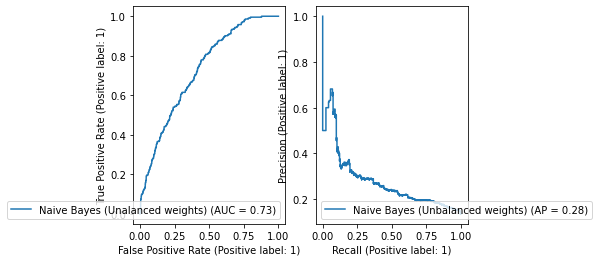

tox21-vdr-bla-agonist-p1
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      1513
           1       0.21      0.72      0.32       171

    accuracy                           0.69      1684
   macro avg       0.58      0.70      0.56      1684
weighted avg       0.88      0.69      0.75      1684



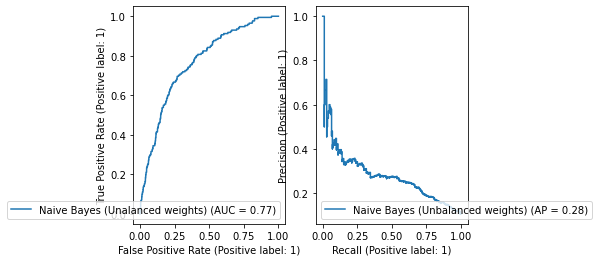

tox21-vdr-bla-antagonist-p1
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      1426
           1       0.17      0.74      0.28       120

    accuracy                           0.70      1546
   macro avg       0.57      0.72      0.54      1546
weighted avg       0.91      0.70      0.77      1546



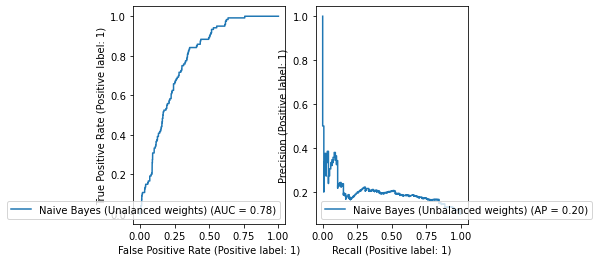

tox21-dt40-p1_653
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1211
           1       0.52      0.66      0.58       536

    accuracy                           0.71      1747
   macro avg       0.68      0.70      0.68      1747
weighted avg       0.74      0.71      0.72      1747



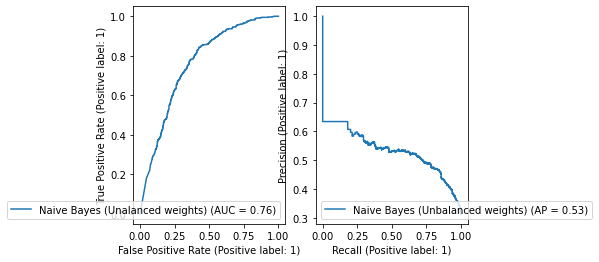

tox21-dt40-p1_100
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1223
           1       0.54      0.68      0.60       581

    accuracy                           0.71      1804
   macro avg       0.68      0.70      0.69      1804
weighted avg       0.73      0.71      0.72      1804



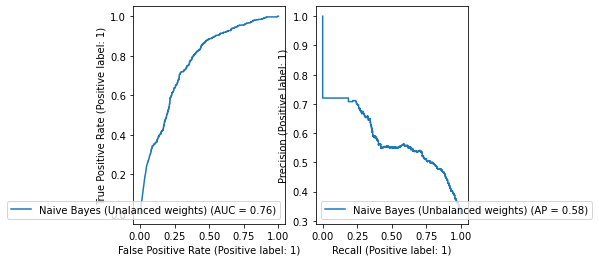

tox21-dt40-p1_657
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1169
           1       0.54      0.65      0.59       570

    accuracy                           0.71      1739
   macro avg       0.68      0.69      0.68      1739
weighted avg       0.72      0.71      0.71      1739



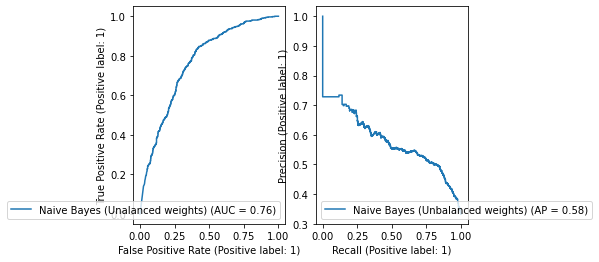

tox21-rt-viability-hepg2-p1
              precision    recall  f1-score   support

           0       0.97      0.73      0.83      1728
           1       0.11      0.61      0.19       100

    accuracy                           0.72      1828
   macro avg       0.54      0.67      0.51      1828
weighted avg       0.92      0.72      0.80      1828



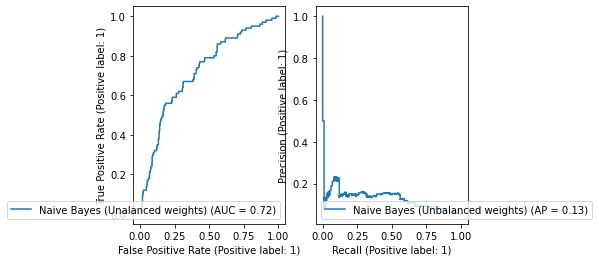

tox21-rt-viability-hek293-p1
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1436
           1       0.33      0.73      0.46       295

    accuracy                           0.71      1731
   macro avg       0.63      0.72      0.63      1731
weighted avg       0.83      0.71      0.74      1731



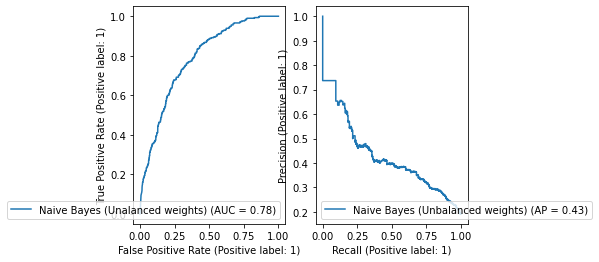

In [ ]:
bal_accs = []
auc_scores = []
for i in range(len(df)):
    one_assay = df[i]
    one_assay = one_assay.drop(one_assay.columns[0],axis=1).drop_duplicates()
    scaler = StandardScaler().fit(one_assay.iloc[:,2:])

    X = scaler.transform(one_assay.iloc[:,2:])
    y = label_encoder.fit_transform(one_assay.iloc[:,0])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
    clf_unbalanced = BernoulliNB(alpha = 50).fit(X_train, y_train)

    y_pred_unbalanced = clf_unbalanced.predict(X_test)
    y_pred_decision = clf.predict_proba(X_test)
    print(one_assay.columns[1])
    print(classification_report(y_test,y_pred_unbalanced))

    bal_acc = balanced_accuracy_score(y_test,y_pred_unbalanced)
    bal_accs.append(bal_acc)

    auc = metrics.roc_auc_score(y_test, y_pred_decision[:, 1])
    auc_scores.append(auc)

    fig, (ax, ax1) = plt.subplots(1,2)
#     ax = plt.gca()

    RocCurveDisplay.from_estimator(clf_unbalanced, X_test, y_test,ax=ax,name="Naive Bayes (Unalanced weights)")

#     ax1 = plt.gca()

    PrecisionRecallDisplay.from_estimator(clf_unbalanced, X_test, y_test,ax=ax1,name="Naive Bayes (Unbalanced weights)")

    plt.show()


In [ ]:
print(np.mean(bal_accs))
print(np.mean(auc_scores))

0.677398287324876
0.7350717680355149


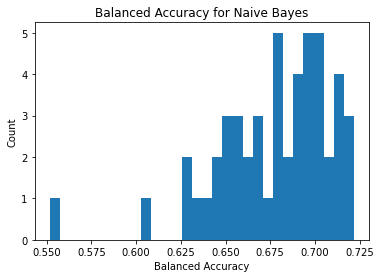

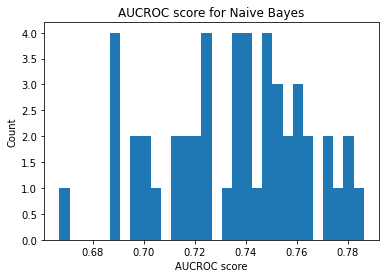

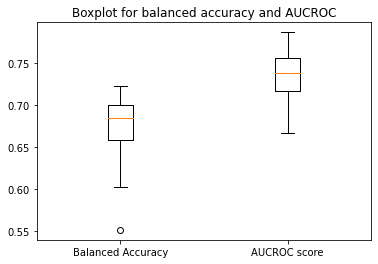

In [ ]:
plt.hist(bal_accs, bins = 30)
plt.title('Balanced Accuracy for Naive Bayes')
plt.xlabel('Balanced Accuracy')
plt.ylabel('Count')
plt.show()

plt.hist(auc_scores, bins = 30)
plt.title('AUCROC score for Naive Bayes')
plt.xlabel('AUCROC score')
plt.ylabel('Count')
plt.show()


plt.boxplot([bal_accs, auc_scores])
plt.title('Boxplot for balanced accuracy and AUCROC')
plt.xticks([1, 2], ["Balanced Accuracy","AUCROC score"])
plt.show()

0.507036170026378
0.5898324667822068
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      1447
           1       0.17      0.38      0.23       284

    accuracy                           0.59      1731
   macro avg       0.50      0.51      0.48      1731
weighted avg       0.73      0.59      0.64      1731

0.1660580460888052


NameError: name 'logistic_cv_unbalanced' is not defined

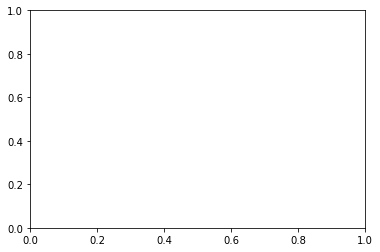

In [ ]:
from sklearn import metrics
print(balanced_accuracy_score(y_test,y_pred_unbalanced))
print(metrics.accuracy_score(y_test,y_pred_unbalanced))
print(classification_report(y_test,y_pred_unbalanced))
print(metrics.average_precision_score(y_test, y_pred_unbalanced))

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_unbalanced)
metrics.auc(fpr, tpr)
ax = plt.gca()
RocCurveDisplay.from_estimator(logistic_cv_unbalanced, X_test, y_test,ax=ax,name="l2-Logistic Regression (Unbalanced weights)")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_pred_unbalanced)

### Balanced weight
    

Standard scale with class weights

In [ ]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.5394095529870492, 1: 6.843639575971731}

In [ ]:
class_wt = []
for j in y_train:
    if j == 0:
        class_wt.append(class_weights[0])
    elif j == 1:
        class_wt.append(class_weights[1])
# print(class_wt.value_counts())
clf_balanced = BernoulliNB(alpha = 50).fit(np.log2([X_train]+1), y_train, sample_weight = class_wt)
len(y_train)

TypeError: can only concatenate list (not "int") to list

In [ ]:
y_pred_balanced = clf_balanced.predict(X_test)
print(classification_report(y_test,y_pred_balanced))
print(balanced_accuracy_score(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79      1436
           1       0.32      0.74      0.45       295

    accuracy                           0.69      1731
   macro avg       0.63      0.71      0.62      1731
weighted avg       0.83      0.69      0.73      1731

0.7127602568339549


In [ ]:
print(clf_balanced.score(X_train, y_train))
print(clf_balanced.score(X_train, y_train, sample_weight = class_wt))
print(clf_balanced.score(X_test, y_test))

# create sample weight for testing set
class_wt_test = []
for i in y_test:
    if i == 0:
        class_wt_test.append(class_weights[0])
    elif i == 1:
        class_wt_test.append(class_weights[1])
print(clf_balanced.score(X_test, y_test, sample_weight = class_wt_test))

0.7020078000866676
0.7133454176147684
0.6932409012131716
0.713046920896018


log-transformed with class weights, FAILED, many nans and 0s after transformed

Run all 50 assays

In [ ]:
# label_encoder object knows how to understand word labels.
from sklearn.inspection import permutation_importance
label_encoder = preprocessing.LabelEncoder()

bal_accs_w = []
auc_scores_w = []
bal_accs_t = []
auc_scores_t = []
f1_scores = []
recall_scores = []
precision_scores = []
f1_scores_t = []
recall_scores_t = []
precision_scores_t = []
pos_class=[]
imp_score = []

# feature_top_40 = ['Chi4v', 'SMR_VSA4', 'EState_VSA5', 'SlogP_VSA10', 'EState_VSA8',
#                   'Kappa3', 'fr_Al_COO', 'SlogP_VSA8', 'PEOE_VSA10', 'fr_amide',
#                   'PEOE_VSA14', 'VSA_EState10', 'FractionCSP3', 'PEOE_VSA4',
#                   'VSA_EState9', 'VSA_EState3', 'MolLogP', 'VSA_EState7', 'BalabanJ',
#                   'fr_ketone_Topliss', 'fr_methoxy', 'MaxAbsPartialCharge',
#                   'MinAbsPartialCharge', 'FpDensityMorgan3', 'BCUT2D_MWHI',
#                   'MinAbsEStateIndex', 'fr_ester', 'fr_bicyclic', 'SlogP_VSA3',
#                   'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'fr_aniline', 'fr_para_hydroxylation',
#                   'EState_VSA2', 'VSA_EState4', 'EState_VSA9', 'PEOE_VSA9', 'SlogP_VSA1',
#                   'SlogP_VSA12', 'TPSA']

feature_top_40 = ['FractionCSP3', 'VSA_EState3', 'SlogP_VSA10', 'PEOE_VSA14', 'fr_Al_COO',
                  'MolLogP', 'SlogP_VSA3', 'VSA_EState9', 'VSA_EState7', 'BCUT2D_LOGPLOW',
                  'qed', 'MinAbsEStateIndex', 'SlogP_VSA1', 'VSA_EState10',
                  'FpDensityMorgan3', 'fr_methoxy', 'MaxAbsPartialCharge', 'BCUT2D_MWHI',
                  'fr_ester', 'BCUT2D_MRHI', 'fr_NH1', 'fr_C_O_noCOO',
                  'MinAbsPartialCharge', 'MinPartialCharge', 'VSA_EState5', 'TPSA',
                  'SlogP_VSA8', 'SlogP_VSA6', 'fr_NH0', 'PEOE_VSA10', 'SlogP_VSA2',
                  'fr_Al_OH_noTert', 'BalabanJ', 'Chi4v', 'VSA_EState1', 'VSA_EState4',
                  'SMR_VSA4', 'fr_Ar_N', 'EState_VSA8', 'BCUT2D_CHGLO']

for w in range(5):
  for i in range(len(df)):
      one_assay = df[i]
      one_assay = one_assay.drop(one_assay.columns[0],axis=1).drop_duplicates(subset='SMILES')
      y = label_encoder.fit_transform(one_assay.iloc[:,0])
      X = one_assay[one_assay.columns.intersection(feature_top_40)]
      scaler = StandardScaler()
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state = w)
      near_miss = RandomUnderSampler(random_state=w)  #NearMiss(version = 1, n_neighbors = 3)
      X_train_resampled, y_train_resampled = near_miss.fit_resample(X_train,y_train)
      print(Counter(y_train_resampled))
      print(Counter(y_train))

      X_train = scaler.fit_transform(X_train_resampled)
      X_test = scaler.transform(X_test)
      clf_balanced = BernoulliNB(alpha = 50).fit(X_train, y_train_resampled)

      y_pred_balanced = clf_balanced.predict(X_test)
      y_pred_prob = clf_balanced.predict_proba(X_test)
      y_train_pred = clf_balanced.predict(X_train)
      y_train_prob = clf_balanced.predict_proba(X_train)
      results = permutation_importance(clf_balanced, X_train, y_train_resampled, scoring='balanced_accuracy')
      importance = results.importances_mean
      imp_score.append(importance)
      #Training performance
      bal_acc_t = balanced_accuracy_score(y_train_resampled,y_train_pred)
      bal_accs_t.append(bal_acc_t)

      auc_t = metrics.roc_auc_score(y_train_resampled, y_train_prob[:, 1])
      auc_scores_t.append(auc_t)

      recall_t = metrics.recall_score(y_train_resampled,y_train_pred)
      recall_scores_t.append(recall_t)

      f1_t = metrics.f1_score(y_train_resampled,y_train_pred)
      f1_scores_t.append(f1_t)

      precision_t = metrics.precision_score(y_train_resampled,y_train_pred)
      precision_scores_t.append(precision_t)

      #Testing performance
      bal_acc = balanced_accuracy_score(y_test,y_pred_balanced)
      bal_accs_w.append(bal_acc)

      auc = metrics.roc_auc_score(y_test, y_pred_prob[:, 1])
      auc_scores_w.append(auc)

      recall_score = metrics.recall_score(y_test, y_pred_balanced)
      recall_scores.append(recall_score)

      f1_score = metrics.f1_score(y_test, y_pred_balanced)
      f1_scores.append(f1_score)

      precision_score = metrics.precision_score(y_test, y_pred_balanced)
      precision_scores.append(precision_score)
  print(len(bal_accs_t))
  print(w)



Counter({0: 548, 1: 548})
Counter({0: 6358, 1: 548})
Counter({0: 350, 1: 350})
Counter({0: 6304, 1: 350})
Counter({0: 670, 1: 670})
Counter({0: 6141, 1: 670})
Counter({0: 752, 1: 752})
Counter({0: 5889, 1: 752})
Counter({0: 564, 1: 564})
Counter({0: 6476, 1: 564})
Counter({0: 500, 1: 500})
Counter({0: 6298, 1: 500})
Counter({0: 488, 1: 488})
Counter({0: 5774, 1: 488})
Counter({0: 810, 1: 810})
Counter({0: 6042, 1: 810})
Counter({0: 611, 1: 611})
Counter({0: 6039, 1: 611})
Counter({0: 675, 1: 675})
Counter({0: 6006, 1: 675})
Counter({0: 472, 1: 472})
Counter({0: 6486, 1: 472})
Counter({0: 315, 1: 315})
Counter({0: 6638, 1: 315})
Counter({0: 699, 1: 699})
Counter({0: 5862, 1: 699})
Counter({0: 469, 1: 469})
Counter({0: 6444, 1: 469})
Counter({0: 337, 1: 337})
Counter({0: 6391, 1: 337})
Counter({0: 668, 1: 668})
Counter({0: 5911, 1: 668})
Counter({0: 723, 1: 723})
Counter({0: 5548, 1: 723})
Counter({0: 845, 1: 845})
Counter({0: 5614, 1: 845})
Counter({0: 379, 1: 379})
Counter({0: 5725, 1:

In [ ]:
#undersampling 80/20 split testing
print('BACC', np.mean(bal_accs_w))
print(np.std(bal_accs_w))

print('auc', np.mean(auc_scores_w))
print(np.std(auc_scores_w))

print('f1', np.mean(f1_scores))
print(np.std(f1_scores))

print('recall', np.mean(recall_scores))
print(np.std(recall_scores))

print('precision', np.mean(precision_scores))
print(np.std(precision_scores))

BACC 0.6818105545213292
0.025098497020371566
auc 0.7584496520122415
0.026633130621102032
f1 0.29363217912943607
0.10739870349497002
recall 0.6228461360712056
0.049793443472281824
precision 0.20211990046582565
0.10443625806727097


In [ ]:
#undersampling 80/20 split training
print('BACC', np.mean(bal_accs_t))
print(np.std(bal_accs_t))

print('auc', np.mean(auc_scores_t))
print(np.std(auc_scores_t))

print('f1', np.mean(f1_scores_t))
print(np.std(f1_scores_t))

print('recall', np.mean(recall_scores_t))
print(np.std(recall_scores_t))

print('precision', np.mean(precision_scores_t))
print(np.std(precision_scores_t))

BACC 0.6897455852191633
0.018923963931136382
auc 0.768779864815361
0.02166621871983682
f1 0.6694497238182269
0.021599817269365457
recall 0.6288780401953659
0.029598070114161417
precision 0.716771920055425
0.026824753510703896


In [ ]:
#undersampling 90/10 split testing
print('BACC', np.mean(bal_accs_w))
print(np.std(bal_accs_w))

print('auc', np.mean(auc_scores_w))
print(np.std(auc_scores_w))

print('f1', np.mean(f1_scores))
print(np.std(f1_scores))

print('recall', np.mean(recall_scores))
print(np.std(recall_scores))

print('precision', np.mean(precision_scores))
print(np.std(precision_scores))

BACC 0.680007059071326
0.036620286103141414
auc 0.756454884594032
0.03696172962442798
f1 0.29172828834736
0.11014568595827287
recall 0.620511874637037
0.07216082237891659
precision 0.20075935824715055
0.10569864975958759


In [ ]:
#undersampling 90/10 split training
print('BACC', np.mean(bal_accs_t))
print(np.std(bal_accs_t))

print('auc', np.mean(auc_scores_t))
print(np.std(auc_scores_t))

print('f1', np.mean(f1_scores_t))
print(np.std(f1_scores_t))

print('recall', np.mean(recall_scores_t))
print(np.std(recall_scores_t))

print('precision', np.mean(precision_scores_t))
print(np.std(precision_scores_t))

BACC 0.6888663347914792
0.017523776730798163
auc 0.7679351533877381
0.019469292004246738
f1 0.6692264708544351
0.02029310463742821
recall 0.6299765421142538
0.02740744437839361
precision 0.7145510012929481
0.02303502350467415


In [ ]:
#class weights 90/10 split
print('BACC', np.mean(bal_accs_w))
print(np.std(bal_accs_w))

print('auc', np.mean(auc_scores_w))
print(np.std(auc_scores_w))

print('f1', np.mean(f1_scores))
print(np.std(f1_scores))

print('recall', np.mean(recall_scores))
print(np.std(recall_scores))

print('precision', np.mean(precision_scores))
print(np.std(precision_scores))

BACC 0.6767061342055178
0.032875894300356374
auc 0.7463993765415915
0.03535274592889625
f1 0.28005474273483255
0.11269373944546066
recall 0.6529778536416331
0.06255484672825956
precision 0.18897812965844354
0.10676492911711102


[0.00252895 0.00270971 0.00278127 0.00596142 0.0034559  0.00320062
 0.00287371 0.00542402 0.00883747 0.00019409 0.00389684 0.00262651
 0.00189269 0.00488179 0.0018825  0.00314633 0.00445505 0.00309256
 0.001851   0.00258936 0.00212443 0.00349887 0.0035597  0.00369466
 0.0020662  0.00281436 0.00309249 0.00260551 0.00282137 0.00187053
 0.00374212 0.01023197 0.00244883 0.00132993 0.00277622 0.00273553
 0.00224615 0.00120139 0.00119079 0.00138369]
[1.60265574e-04 1.71720884e-04 1.76255752e-04 3.77789868e-04
 2.19008716e-04 2.02831224e-04 1.82113763e-04 3.43733608e-04
 5.60052006e-04 1.23002170e-05 2.46951926e-04 1.66448150e-04
 1.19944471e-04 3.09371119e-04 1.19298400e-04 1.99390722e-04
 2.82327620e-04 1.95982845e-04 1.17302374e-04 1.64093947e-04
 1.34630166e-04 2.21731643e-04 2.25586908e-04 2.34139253e-04
 1.30940418e-04 1.78353127e-04 1.95978496e-04 1.65117369e-04
 1.78797192e-04 1.18539876e-04 2.37147325e-04 6.48424828e-04
 1.55188560e-04 8.42811328e-05 1.75935648e-04 1.73357002e-04
 1.

<BarContainer object of 40 artists>

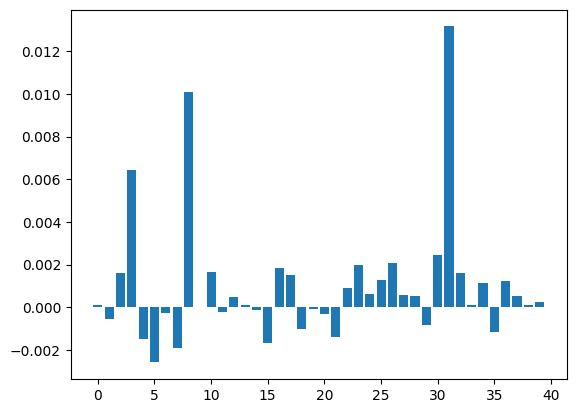

In [ ]:
from scipy.stats import sem
v = np.array([sum(x)/len(x) for x in zip(*imp_score)])
print(np.array([np.std(x) for x in zip(*imp_score)]))
print(np.array([sem(x) for x in zip(*imp_score)]))
plt.bar([x for x in range(len(v))], v)

In [ ]:
for i,z in enumerate(v):
 print('Feature: %0d, Score: %.5f' % (i,z))

Feature: 0, Score: 0.00012
Feature: 1, Score: -0.00056
Feature: 2, Score: 0.00162
Feature: 3, Score: 0.00641
Feature: 4, Score: -0.00147
Feature: 5, Score: -0.00258
Feature: 6, Score: -0.00026
Feature: 7, Score: -0.00190
Feature: 8, Score: 0.01011
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00167
Feature: 11, Score: -0.00022
Feature: 12, Score: 0.00048
Feature: 13, Score: 0.00010
Feature: 14, Score: -0.00014
Feature: 15, Score: -0.00165
Feature: 16, Score: 0.00183
Feature: 17, Score: 0.00153
Feature: 18, Score: -0.00104
Feature: 19, Score: -0.00008
Feature: 20, Score: -0.00031
Feature: 21, Score: -0.00138
Feature: 22, Score: 0.00090
Feature: 23, Score: 0.00198
Feature: 24, Score: 0.00061
Feature: 25, Score: 0.00126
Feature: 26, Score: 0.00206
Feature: 27, Score: 0.00059
Feature: 28, Score: 0.00054
Feature: 29, Score: -0.00081
Feature: 30, Score: 0.00245
Feature: 31, Score: 0.01316
Feature: 32, Score: 0.00160
Feature: 33, Score: 0.00012
Feature: 34, Score: 0.00114
Feature: 35, Scor

In [ ]:
neg_class_prob_sorted = clf_balanced.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = clf_balanced.feature_log_prob_[1, :].argsort()[::-1]

print(np.take(feature_top_40, neg_class_prob_sorted[:10]))
print(np.take(feature_top_40, pos_class_prob_sorted))
print(pos_class_prob_sorted)
clf_balanced.feature_log_prob_[1, :]

['SlogP_VSA8' 'SlogP_VSA10' 'Kappa3' 'EState_VSA5' 'BCUT2D_MRHI'
 'SMR_VSA4' 'fr_aniline' 'BalabanJ' 'PEOE_VSA14' 'BCUT2D_MWHI']
['fr_aniline' 'PEOE_VSA10' 'PEOE_VSA14' 'SlogP_VSA10' 'SMR_VSA4'
 'PEOE_VSA4' 'FpDensityMorgan3' 'EState_VSA8' 'BCUT2D_MWHI' 'EState_VSA5'
 'fr_bicyclic' 'MaxAbsPartialCharge' 'fr_ester' 'BalabanJ' 'SlogP_VSA3'
 'MinAbsPartialCharge' 'VSA_EState7' 'fr_methoxy' 'fr_Al_COO' 'MolLogP'
 'Kappa3' 'EState_VSA9' 'SlogP_VSA8' 'BCUT2D_MRHI' 'VSA_EState3'
 'VSA_EState9' 'fr_ketone_Topliss' 'MinAbsEStateIndex' 'VSA_EState4'
 'BCUT2D_LOGPLOW' 'Chi4v' 'VSA_EState10' 'EState_VSA2' 'FractionCSP3'
 'TPSA' 'PEOE_VSA9' 'SlogP_VSA12' 'SlogP_VSA1' 'fr_para_hydroxylation'
 'fr_amide']
[31  8 10  3  1 13 23  4 24  2 27 21 26 18 28 22 17 20  6 16  5 35  7 30
 15 14 19 25 34 29  0 11 33 12 39 36 38 37 32  9]


array([-1.43917085, -0.62420569, -0.75002377, -0.58194977, -0.72480617,
       -0.91634937, -0.88176806, -0.98662065, -0.45380343, -3.81678238,
       -0.53795827, -1.56073229, -1.65084574, -0.64698212, -1.17278727,
       -1.07096791, -0.89890924, -0.85069358, -0.81146231, -1.1957856 ,
       -0.86970179, -0.79129958, -0.85069358, -0.67620213, -0.74577642,
       -1.26813534, -0.80021064, -0.78908417, -0.82513358, -1.33843487,
       -1.00019367, -0.24979573, -2.76122688, -1.57035314, -1.31195662,
       -0.92645344, -1.95457602, -2.3290006 , -2.09944383, -1.80335336])

In [ ]:
pos_class_prob = np.array([sum(x)/len(x) for x in zip(*pos_class)]).argsort()[::-1]
print(np.take(feature_top_40, pos_class_prob))

['fr_aniline' 'PEOE_VSA10' 'SMR_VSA4' 'PEOE_VSA4' 'FpDensityMorgan3'
 'PEOE_VSA14' 'EState_VSA8' 'EState_VSA5' 'MaxAbsPartialCharge' 'fr_ester'
 'BalabanJ' 'MinAbsPartialCharge' 'SlogP_VSA10' 'BCUT2D_MWHI' 'Kappa3'
 'VSA_EState7' 'SlogP_VSA3' 'fr_bicyclic' 'fr_methoxy' 'fr_Al_COO'
 'MolLogP' 'SlogP_VSA8' 'BCUT2D_MRHI' 'VSA_EState3' 'EState_VSA9'
 'VSA_EState9' 'fr_ketone_Topliss' 'MinAbsEStateIndex' 'VSA_EState10'
 'BCUT2D_LOGPLOW' 'VSA_EState4' 'Chi4v' 'FractionCSP3' 'EState_VSA2'
 'TPSA' 'PEOE_VSA9' 'SlogP_VSA12' 'fr_para_hydroxylation' 'SlogP_VSA1'
 'fr_amide']


In [ ]:
# pos_class.to_csv(path + 'pos_class')
np.save(path + 'imp_score.npy', imp_score)

In [ ]:
print(np.mean(bal_accs_t))
print(np.std(bal_accs_t))

0.6868922145868583
0.016906110422884413


In [ ]:
#Training with new 40 features
print('BACC', np.mean(bal_accs_t))
print(np.std(bal_accs_t))

print('auc', np.mean(auc_scores_t))
print(np.std(auc_scores_t))

print('f1', np.mean(f1_scores_t))
print(np.std(f1_scores_t))

print('recall', np.mean(recall_scores_t))
print(np.std(recall_scores_t))

print('precision', np.mean(precision_scores_t))
print(np.std(precision_scores_t))

BACC 0.6835241369953103
0.015938044687144597
auc 0.754404065107381
0.017678898681924095
f1 0.2873169443945361
0.10894328485398197
recall 0.6663363399183627
0.02595082709992412
precision 0.19385744415229078
0.10455752948918516


In [ ]:
# Old 40 features
print('BACC', np.mean(bal_accs_w))
print(np.std(bal_accs_w))

print('auc', np.mean(auc_scores_w))
print(np.std(auc_scores_w))

print('f1', np.mean(f1_scores))
print(np.std(f1_scores))

print('recall', np.mean(recall_scores))
print(np.std(recall_scores))

print('precision', np.mean(precision_scores))
print(np.std(precision_scores))

BACC 0.6807777324824442
0.02652918650123065
auc 0.7508451522359342
0.026549774973513966
f1 0.28566126545602394
0.1090859883893046
recall 0.6650491057321166
0.05455258914475373
precision 0.19241420033553783
0.10415333696560004


In [ ]:
#new 40 features
print('BACC', np.mean(bal_accs_w))
print(np.std(bal_accs_w))

print('auc', np.mean(auc_scores_w))
print(np.std(auc_scores_w))

print('f1', np.mean(f1_scores))
print(np.std(f1_scores))

print('recall', np.mean(recall_scores))
print(np.std(recall_scores))

print('precision', np.mean(precision_scores))
print(np.std(precision_scores))

BACC 0.6787071680204717
0.025111822940463022
auc 0.7476749769570099
0.025737784712471845
f1 0.28138139869505596
0.11095644338870612
recall 0.657219127565591
0.0483968408660744
precision 0.18980996879306947
0.10623245060251486


In [ ]:
pd.DataFrame(bal_accs_w).to_csv(path + 'nb_bal_acc_90_10.csv', index=False)
pd.DataFrame(auc_scores_w).to_csv(path + 'nb_auc_90_10.csv', index=False)
pd.DataFrame(bal_accs_t).to_csv(path + 'nb_bal_acc_t_90_10.csv', index=False)
pd.DataFrame(auc_scores_t).to_csv(path + 'nb_auc_t_90_10.csv', index=False)

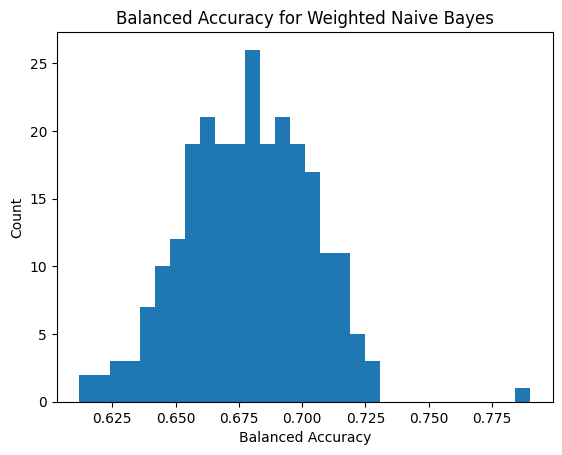

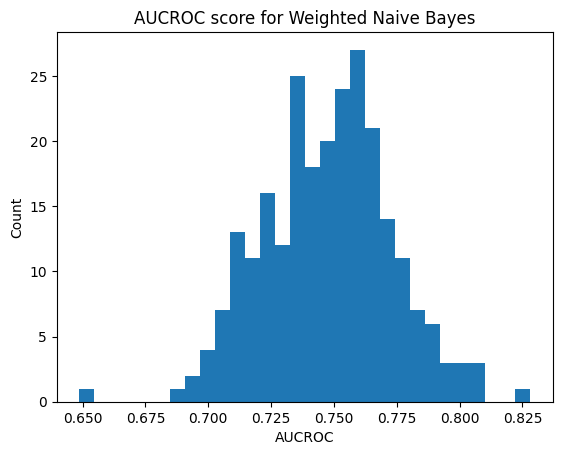

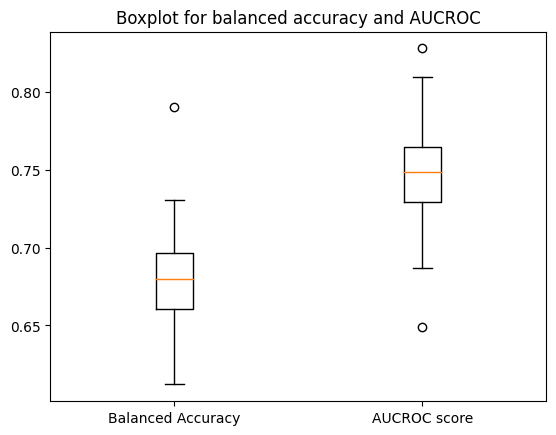

In [ ]:
plt.hist(bal_accs_w, bins = 30)
plt.title('Balanced Accuracy for Weighted Naive Bayes')
plt.xlabel('Balanced Accuracy')
plt.ylabel('Count')
plt.show()

plt.hist(auc_scores_w, bins = 30)
plt.title('AUCROC score for Weighted Naive Bayes')
plt.xlabel('AUCROC')
plt.ylabel('Count')
plt.show()


plt.boxplot([bal_accs_w, auc_scores_w])
plt.title('Boxplot for balanced accuracy and AUCROC')
plt.xticks([1, 2], ["Balanced Accuracy","AUCROC score"])
plt.show()

In [ ]:
print(balanced_accuracy_score(y_test,y_pred_balanced))
print(metrics.accuracy_score(y_test,y_pred_balanced))
print(classification_report(y_test,y_pred_balanced))
print(metrics.average_precision_score(y_test, y_pred_balanced))
print(metrics.roc_auc_score(y_test, y_pred_balanced))

0.7243763201183604
0.7047949162333911
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1447
           1       0.33      0.75      0.46       284

    accuracy                           0.70      1731
   macro avg       0.63      0.72      0.63      1731
weighted avg       0.84      0.70      0.74      1731

0.2866276344436852
0.7243763201183605


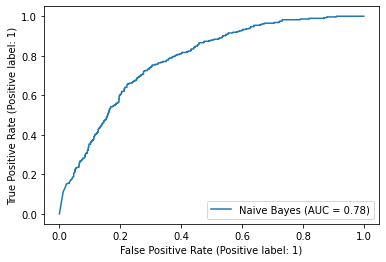

In [ ]:
ax = plt.gca()
RocCurveDisplay.from_estimator(clf_balanced, X_test, y_test,ax=ax,name="Naive Bayes")
plt.show()

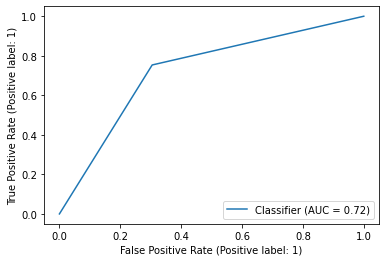

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred_balanced)

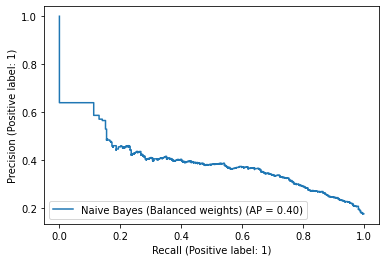

In [ ]:
ax = plt.gca()
PrecisionRecallDisplay.from_estimator(clf_balanced, X_test, y_test,ax=ax,name="Naive Bayes (Balanced weights)")


In [ ]:
print(np.mean(bal_accs))
print(np.mean(bal_accs_w))

0.677398287324876
0.6930723030380814


As a summary so far, compare with unbalanced naive bayesian model, the balanced accuracy increased about 2 percent, the average balanced accuracy is 69.31%. Tried log-transformed the features, however, many of them are giving nans and zeros, even after +1, so we stay with standard scaler.

## Pymc data with naive bayesian with priors

In [ ]:
df = pd.read_csv('pymc_data.csv')
df_1 = df.iloc[:100, :5]
df_1['outcome'] = df.iloc[:100, -6]
df_2 = df.iloc[100:200, :5]
df_2['outcome'] = df.iloc[100:200, -6]
df_3 = df.iloc[200:300, :5]
df_3['outcome'] = df.iloc[200:300, -6]
df_4 = df.iloc[300:, :5]
df_4['outcome'] = df.iloc[300:, -6]
df_list = [df_1, df_2, df_3, df_4]

In [ ]:
one_assay = df_list[3]
one_assay = one_assay.drop(one_assay.columns[0],axis=1)
# scaler = StandardScaler().fit(one_assay.iloc[:,:4])

# X = scaler.transform(one_assay.iloc[:,:4])
# y = label_encoder.fit_transform(one_assay.iloc[:,4])
one_assay.iloc[:,4].value_counts()

0.0    50
1.0    50
Name: outcome, dtype: int64

0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.62      0.77         8

    accuracy                           0.85        20
   macro avg       0.90      0.81      0.83        20
weighted avg       0.88      0.85      0.84        20



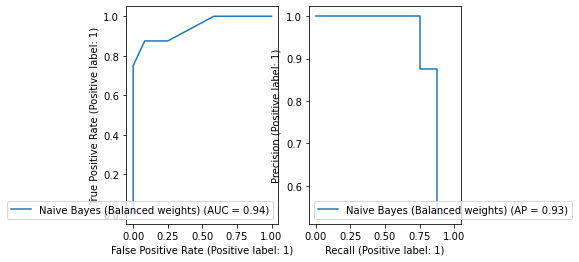

1
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.67      0.75      0.71         8

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



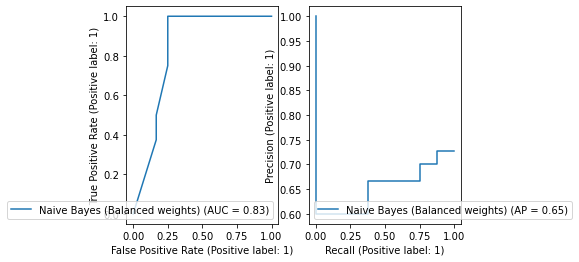

2
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.56      0.62      0.59         8

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.64        20
weighted avg       0.66      0.65      0.65        20



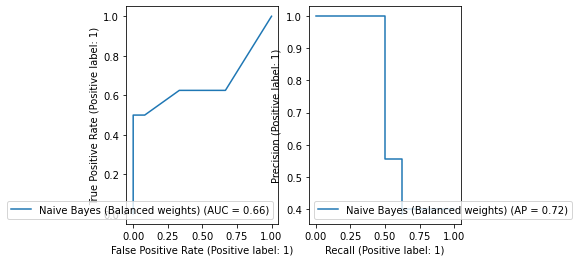

3
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.67      0.75      0.71         8

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



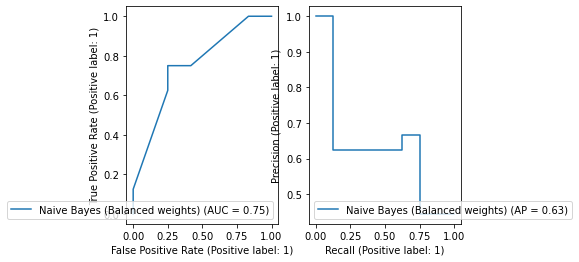

In [ ]:
label_encoder = preprocessing.LabelEncoder()

bal_accs_w = []
auc_scores_w = []
for i in range(len(df_list)):
    one_assay = df_list[i]
    one_assay = one_assay.drop(one_assay.columns[0],axis=1)
    scaler = StandardScaler().fit(one_assay.iloc[:,:4])

    X = scaler.transform(one_assay.iloc[:,:4])
    y = label_encoder.fit_transform(one_assay.iloc[:,4])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state = 42)

    class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
    class_weights = dict(zip(np.unique(y_train), class_weights))

    class_wt = []
    for j in y_train:
        if j == 0:
            class_wt.append(class_weights[0])
        elif j == 1:
            class_wt.append(class_weights[1])

    clf_balanced = BernoulliNB(alpha = 50).fit(X_train, y_train, sample_weight = class_wt)

    y_pred_balanced = clf_balanced.predict(X_test)
    y_pred_prob = clf_balanced.predict_proba(X_test)
    print(i)
    print(classification_report(y_test,y_pred_balanced))

    bal_acc = balanced_accuracy_score(y_test,y_pred_balanced)
    bal_accs_w.append(bal_acc)

    auc = metrics.roc_auc_score(y_test, y_pred_prob[:, 1])
    auc_scores_w.append(auc)

    fig, (ax, ax1) = plt.subplots(1,2)
#     ax = plt.gca()

    RocCurveDisplay.from_estimator(clf_balanced, X_test, y_test,ax=ax,name="Naive Bayes (Balanced weights)")

#     ax1 = plt.gca()

    PrecisionRecallDisplay.from_estimator(clf_balanced, X_test, y_test,ax=ax1,name="Naive Bayes (Balanced weights)")

    plt.show()

In [ ]:
print(np.mean(bal_accs_w))
print(np.mean(auc_scores_w))

0.7395833333333333
0.796875
